### First load the required modules

In [1]:
from spec_deconv import spec_deconv

In [2]:
ftir = spec_deconv(6)

Spectral deconvolution module loaded: 6 peaks.


### We will now load in the data, and restrict the domain to the domain of interest. 
i.e. the OH stretch.

In [3]:
data = ftir.load('test_data_2DMSO.txt')

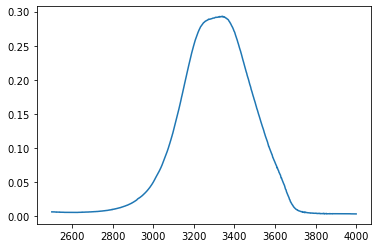

In [4]:
x, y = ftir.pretty_data(data, 2500, plot=True)

### What function do you want to fit?
i.e. Gaussian, Lorentzian, or Voight?

In [5]:
ftir.fun('gaussian')

### Now we create a list of the location of each of the peak centers. 
We also set the lower and upper bound fraction for each of the centroid peaks.

In [6]:
centroids = [3045, 3139, 3241, 3389, 3533, 3629, 3400, 3400]

lower = 0.95
upper = 1.05

### Here we automatically create the parameters for each of the peaks: amplitude, centroid and sigma.

In [7]:
params = ftir.auto_params(centroids, lower=lower, upper=upper)

### Run the below cell if you want to fix the position of each of the sub-peaks center. This is a good idea if running for the first time.

In [8]:
ftir.fix_centroid(params)


In [9]:
params

name,value,initial value,min,max,vary
num_peaks,6.00000000,6,-inf,inf,False
amp_1,0.10000000,0.1,0.00000000,75.0000000,True
cen_1,3045.00000,3045,2892.75000,3197.25000,False
sigma_1,25.0000000,25,0.00000000,310.000000,True
amp_2,0.10000000,0.1,0.00000000,75.0000000,True
cen_2,3139.00000,3139,2982.05000,3295.95000,False
sigma_2,25.0000000,25,0.00000000,310.000000,True
amp_3,0.10000000,0.1,0.00000000,75.0000000,True
cen_3,3241.00000,3241,3078.95000,3403.05000,False
sigma_3,25.0000000,25,0.00000000,310.000000,True


### We're here! Now to fit the data and plot the results.

In [10]:
fit = ftir.fit(params, x, y, method='least_squares')

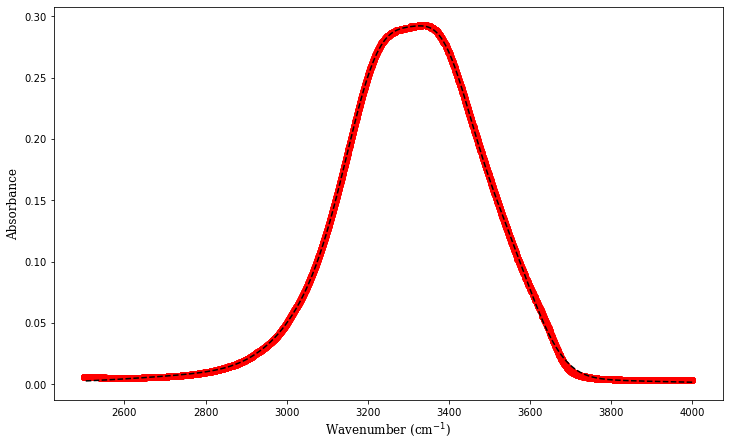

In [11]:
model, peak1, peak2, peak3, peak4, peak5, peak6 = ftir.update_peaks(fit.params)
ftir.plot_model(model)

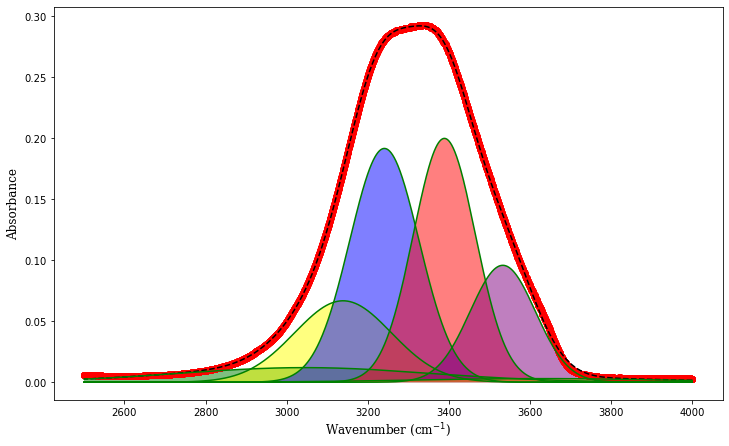

In [12]:
ftir.plot_all(fit.params, opac=0.5)

In [13]:
fit.params

name,value,standard error,relative error,initial value,min,max,vary
num_peaks,6.00000000,0.00000000,(0.00%),6,-inf,inf,False
amp_1,9.30431755,0.06683256,(0.72%),0.1,0.00000000,75.0000000,True
cen_1,3045.00000,0.00000000,(0.00%),3045,2892.75000,3197.25000,False
sigma_1,310.000000,3.28674793,(1.06%),25,0.00000000,310.000000,True
amp_2,19.9965798,0.10545239,(0.53%),0.1,0.00000000,75.0000000,True
cen_2,3139.00000,0.00000000,(0.00%),3139,2982.05000,3295.95000,False
sigma_2,119.475147,0.31784778,(0.27%),25,0.00000000,310.000000,True
amp_3,41.0373044,0.08238632,(0.20%),0.1,0.00000000,75.0000000,True
cen_3,3241.00000,0.00000000,(0.00%),3241,3078.95000,3403.05000,False
sigma_3,85.4175298,0.11953097,(0.14%),25,0.00000000,310.000000,True
